# Ratios of light nuclei in the statistical model

In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

## Formulas for the particle density $n$:

We use the formula for the particle density $n_i$ from the lecture (slide 6 of chapter 5):

$$ 
n_i = g_i \frac{4 \pi}{(2 \pi)^3} \int_0^{\infty} \frac{p^2\,\mathrm dp}{\exp\left(\frac{\sqrt{p^2+m^2}-\mu}{T}\right) \pm 1}
 = 
\frac{g_i}{2 \pi^2} m^2 T \sum \limits_{k=1}^{\infty} \frac{(\mp 1)^{k+1}}{k} e^{k \mu / T} 
K_2\left( \frac{k m}{T}\right)
$$

Here the upper sign is for fermions and the lower signs for bosons.

In [2]:
def n_hadron_general(T, mu, m, g, sign, nsum):
    """
    Hadron density in a simple statistical mode (vanashing baryo-chemical potential)
    T: temperature
    mu: baryo-chemical potential
    m: hadron mass
    g: degeneracy
    sign: + for bosons, - for fermions
    nsum: number of terms to add up
    """
    sum = 0
    for k in range(1, nsum+1):
        sum += T*g/(2*np.pi**2) * sign**(k+1)/k * m**2 * np.exp(k * mu / T) * special.kn(2,k*m/T)
    return sum

The Boltzmann approximation takes only the first term of the sum (which is the same for bosons and for fermions):

$$
n_i = 
\frac{g_i}{2 \pi^2} m^2 T e^{\mu / T} 
K_2\left( \frac{m}{T}\right)
$$

In [3]:
def n_hadron_boltzmann(T, mu, m, g):
    """
    Take only first term of the sum in n_hadron_general.
    First term is the same for bosons and fernions (independent of the sign)
    """
    return n_hadron_general(T, mu, m, g, 1, 1)

Large argument approximation of the Bessel function:
    
$$ K_\nu(x) \approx \sqrt{\frac{\pi}{2 x}} e^{-x} $$ 

This gives

$$ n_i = \frac{g}{(2 \pi)^{3/2}} (m T)^{3/2} e^{-m/T}$$

In [4]:
def n_hadron_approx_bessel(T, mu, m, g):
    return g/(2*np.pi)**(3/2) * (m * T)**(3/2) * np.exp(mu/T) * np.exp(-m/T)

## Plot particle density per degree of freedom for different approximations

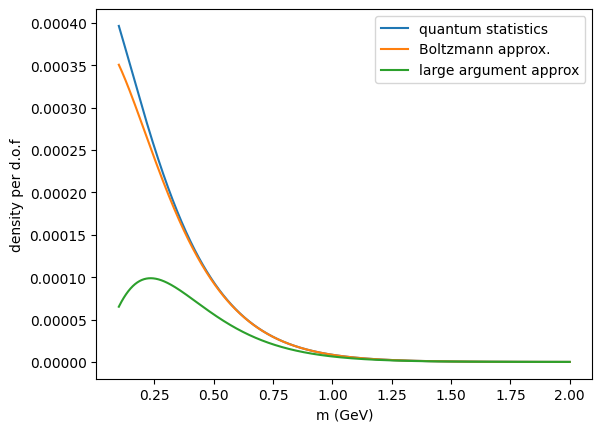

In [10]:
mval = np.linspace(0.1, 2, 1000)
n_had_gen_bose = n_hadron_general(0.156, 0, mval, 1, 1, 20)
n_had_boltz = n_hadron_boltzmann(0.156, 0, mval, 1)
n_had_approx_bessel = n_hadron_approx_bessel(0.156, 0, mval, 1)
# plt.yscale('log')
plt.xlabel('m (GeV)')
plt.ylabel("density per d.o.f")
plt.plot(mval, n_had_gen_bose, label='quantum statistics')
plt.plot(mval, n_had_boltz, label='Boltzmann approx.')
plt.plot(mval, n_had_approx_bessel, label='large argument approx')
plt.legend()

## Calculate densities for d, ${}^3$He, and ${}^4$He

In [6]:
# define nuclear masses (in GeV)
m_d = 1.8756
m_he3 = 2.8084
m_he4 = 3.7274

In [7]:
n_d_gen = n_hadron_general(0.156, 0, m_d, 3, +1, 20)
n_he3_gen = n_hadron_general(0.156, 0, m_he3, 2, -1, 20)
n_he4_gen = n_hadron_general(0.156, 0, m_he4, 1, +1, 20)
print("n_he3_gen/n_d_gen: ", '{:.4E}'.format(n_he3_gen/n_d_gen))
print("n_he4_gen/n_d_gen: ", '{:.4E}'.format(n_he4_gen/n_d_gen))

n_he3_gen/n_d_gen:  2.9446E-03
n_he4_gen/n_d_gen:  6.0723E-06


In [8]:
n_d_boltz = n_hadron_approx_bessel(0.156, 0, m_d, 3)
n_he3_boltz = n_hadron_approx_bessel(0.156, 0, m_he3, 2)
n_he4_boltz = n_hadron_approx_bessel(0.156, 0, m_he4, 1)
print("n_he3_approx/n_d_approx: ", '{:.4E}'.format(n_he3_boltz/n_d_boltz))
print("n_he4_approx/n_d_approx: ", '{:.4E}'.format(n_he4_boltz/n_d_boltz))

n_he3_approx/n_d_approx:  3.0905E-03
n_he4_approx/n_d_approx:  6.5310E-06


ALICE data (read off by eye):

$n_{He3} / n_{d} = 3 \cdot 10^{-3}$

$n_{He4} / n_{d} = 1 \cdot 10^{-5}$
